In [1]:
import pandas as pd
import numpy as np
import snappy

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### **A) Importar Dados de Chuvas, Pressao, Precipitação e Temperatura**

In [2]:
# Carga do arquivo csv preparada para a análise exploratória de dados. Ajustes de separador, primeira coluna como índice e parse de Data.
datapath =  '../../Data/process/patio1_posicaoVento.parquet'
dataframe = pd.read_parquet(datapath)

### <span style="color:#C71585"> **B) Visualização Gráfica - Série Temporal**

Séries temporais são uma séries de observações registradas em intervalos de tempo regulares.<p>

Normalmente, se usa o conceito de séries temporais para:<br>
- Identificar a natureza do fenômeno representado pela sequência de observações para encontrar padrões de comportamentos; e<br>
- Usar modelos estatísticos para prever valores futuros, baseando-se em resultados do passado.


#### <span style="color:#4B0082"> **B.1) Vento Observado (m/s)**

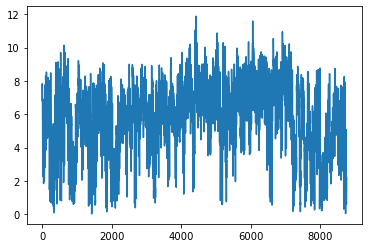

In [28]:
plt.plot(dataframe.index, dataframe.Magnitude_Observada);

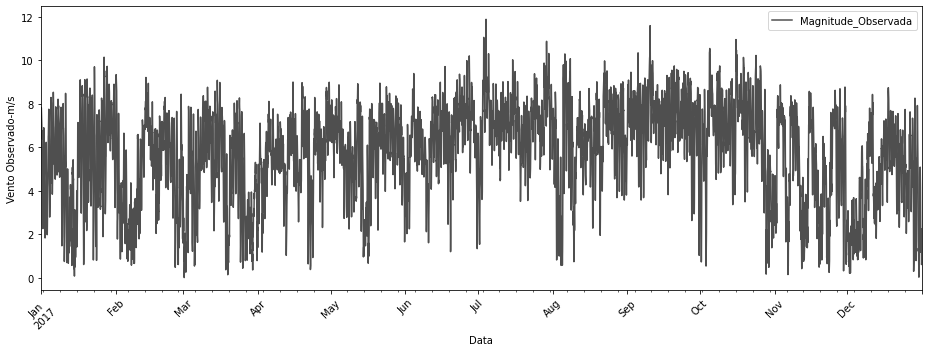

In [55]:
df_serietemporal = dataframe.drop(['Longitude', 'Latitude','PosicaoVento','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva'], axis=1)
df_serietemporal = df_serietemporal.set_index('Data')

df_serietemporal.head()
df_serietemporal.plot(figsize=(13,5),color='#4F4F4F')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Vento Observado-m/s')
plt.tight_layout()

#### <span style="color:#4B0082"> **B.2) Vento Verificado (m/s)**

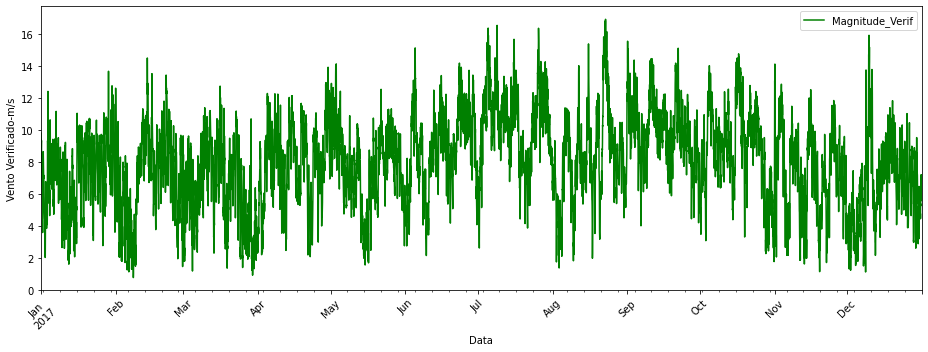

In [56]:
df_serietemporal = dataframe.drop(['Longitude', 'Latitude','PosicaoVento','Magnitude_Observada','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva'], axis=1)
df_serietemporal = df_serietemporal.set_index('Data')
df_serietemporal_verif = df_serietemporal

df_serietemporal.head()
df_serietemporal.plot(figsize=(13,5),color='green')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Vento Verificado-m/s')
plt.tight_layout()

#### <span style="color:#4B0082"> **B.3) Temperatura (ºC)**

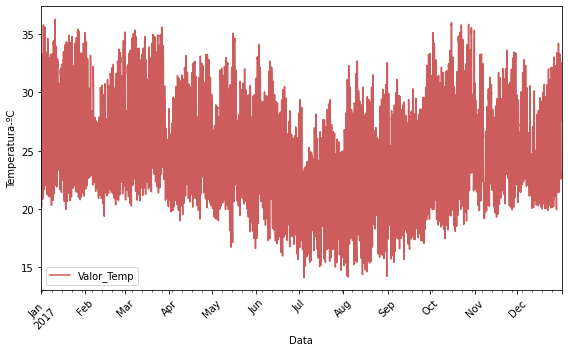

In [52]:
df_serietemporal = dataframe.drop(['Longitude', 'Latitude','PosicaoVento','Magnitude_Observada','Direcao','Magnitude_Verif','Valor_Pressao','Valor_Chuva'], axis=1)
df_serietemporal = df_serietemporal.set_index('Data')

df_serietemporal.head()
df_serietemporal.plot(figsize=(8,5),color='#CD5C5C')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Temperatura-ºC')
plt.tight_layout()

#### <span style="color:#4B0082"> **B.4) Pressão Atmosférica (h/PA)**

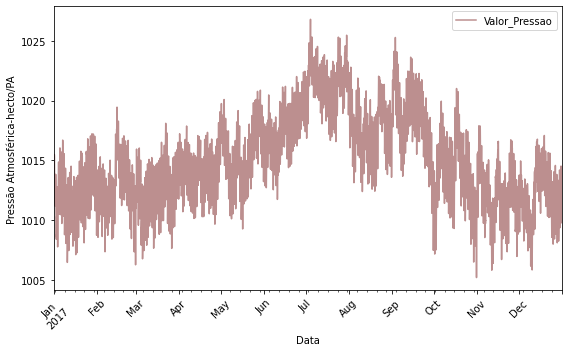

In [51]:
df_serietemporal = dataframe.drop(['Longitude', 'Latitude','PosicaoVento','Magnitude_Observada','Direcao','Magnitude_Verif','Valor_Temp','Valor_Chuva'], axis=1)
df_serietemporal = df_serietemporal.set_index('Data')

df_serietemporal.head()
df_serietemporal.plot(figsize=(8,5),color='#BC8F8F')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Pressão Atmosférica-hecto/PA')
plt.tight_layout()

#### <span style="color:#4B0082"> **B.5) Chuva (mm/s)**

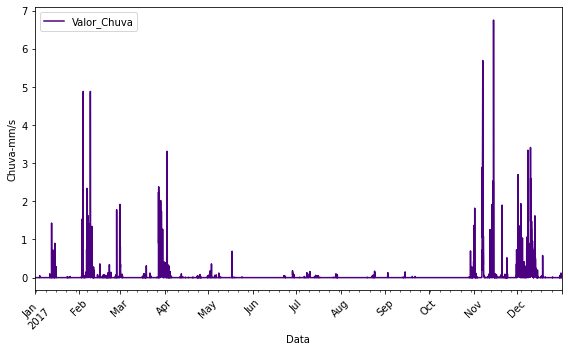

In [50]:
df_serietemporal = dataframe.drop(['Longitude', 'Latitude','PosicaoVento','Magnitude_Observada','Direcao','Magnitude_Verif','Valor_Pressao','Valor_Temp'], axis=1)
df_serietemporal = df_serietemporal.set_index('Data')

df_serietemporal.head()
df_serietemporal.plot(figsize=(8,5),color='#4B0082')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Chuva-mm/s')
plt.tight_layout()

### <span style="color:#4B0082">**D.3 Visualizando as Séries de Vento Observado x Verificado - Sem a Normalização**

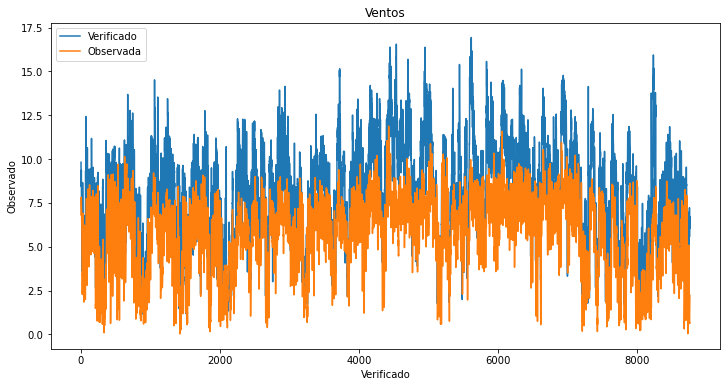

In [32]:
plt.figure(figsize=[12,6],facecolor="white")
plt.plot(dataframe['Magnitude_Verif'])
plt.plot(dataframe['Magnitude_Observada'])
plt.title('Ventos',fontsize=12)
plt.xlabel('Verificado')
plt.ylabel('Observado')
plt.legend(['Verificado','Observada'])
plt.show()

### <span style="color:#4B0082">**D.4 Vento Verificado x Observado Normalizada a 100**

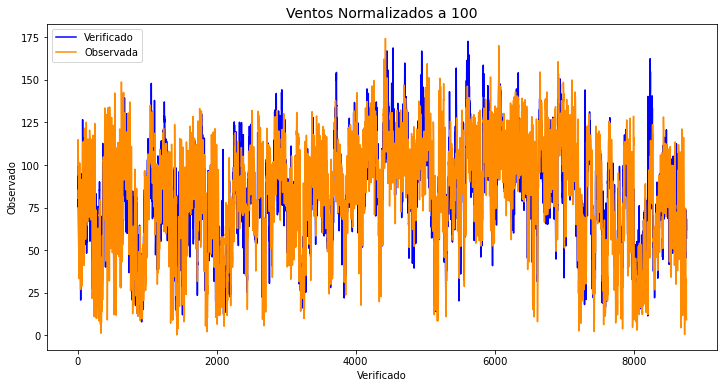

In [47]:
plt.figure(figsize=[12,6],facecolor="white")
plt.plot((dataframe['Magnitude_Verif']/dataframe['Magnitude_Verif'].iloc[0]*100),color='blue')
plt.plot((dataframe['Magnitude_Observada']/dataframe['Magnitude_Observada'].iloc[0]*100),color='#FF8C00')

plt.title('Ventos Normalizados a 100',fontsize=14)
plt.xlabel('Verificado')
plt.ylabel('Observado')
plt.legend(['Verificado','Observada'])
plt.show()
plt.show()

### <span style="color:#C71585"> **C) Plotar Decomposição no Vento Verificado**

O objetivo é decompor o gráfico em 4(quatro) tipos. Os plots gerados pela biblioteca <i>statsmodels</i> foram:<br>
- Observação original
- Tendência
- Sazonalidade
- Residual
    

Antes mesmo de explorar um gráfico temporal, é necessário conhecer 2 componentes básicos das time series.<br>
<b>1.Tendência</b>:  É a direção geral de alguma coisa que está se desenvolvendo ou evoluindo no eixo do tempo.
<p>
<b>2.Sazonalidade</b>: É qualquer mudança ou padrão previsível em uma série temporal. Essa oscilação pode ser recorrente ou se repetir ao longo de um determinado período de tempo. Dependendo o ruído nos dados obtidos, também é facilmente detectada em gráficos.

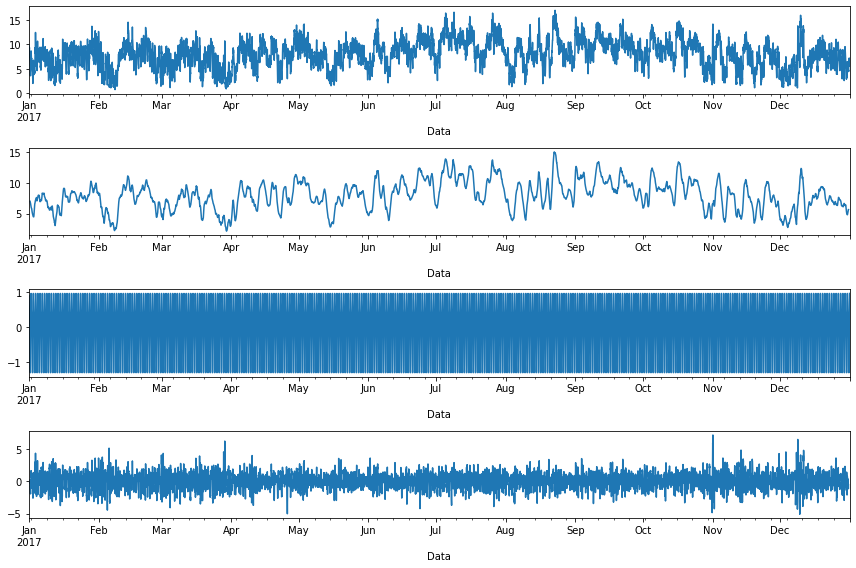

In [6]:
# from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_serietemporal_verif)
 
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2) # Comportamento médio de descida e subida no intervalo de tempo
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

#### <span style="color:#4B0082"> **C.1) Média Móvel do Vento Verificado**

<AxesSubplot:xlabel='Data'>

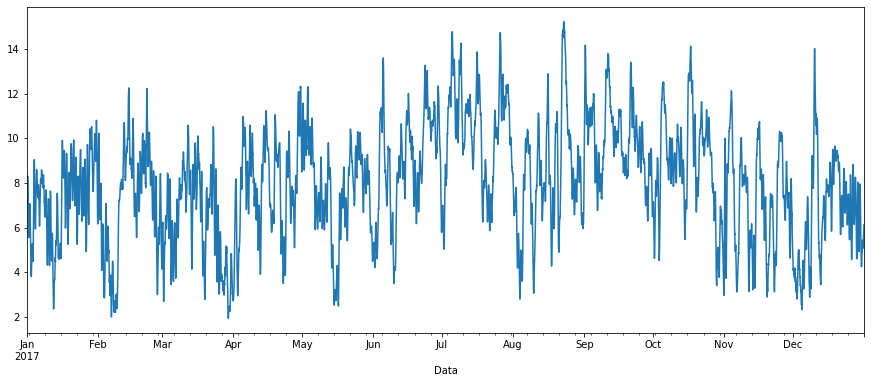

In [9]:
df_serietemporal_verif.Magnitude_Verif.rolling(12).mean().plot(figsize=(15,6))

Data
2017    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Magnitude_Verif, dtype: object

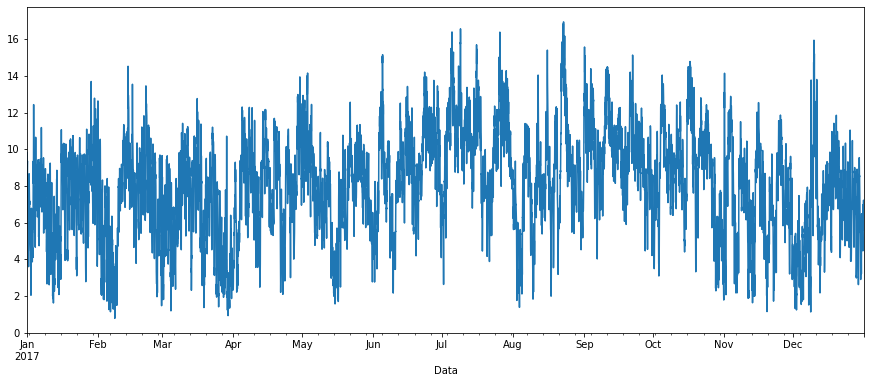

In [57]:
# Identificar o padrão (como a média móvel) com o comando GROUPBY
df_serietemporal_verif.Magnitude_Verif.groupby(df_serietemporal_verif.index.year).plot(figsize=(15,6))

### Visão Sem SAZONALIDADE

Analisar picos ou quedas em períodos ciclicos

<AxesSubplot:xlabel='Data'>

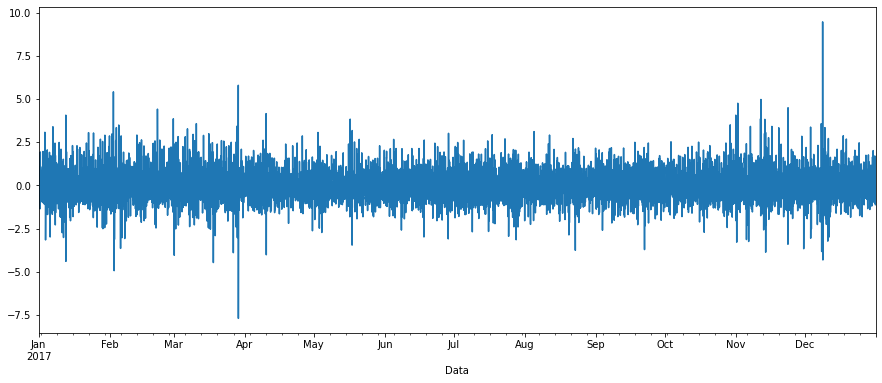

In [19]:
df_serietemporal_verif.Magnitude_Verif.diff().plot(figsize=(15,6))

<AxesSubplot:xlabel='Data'>

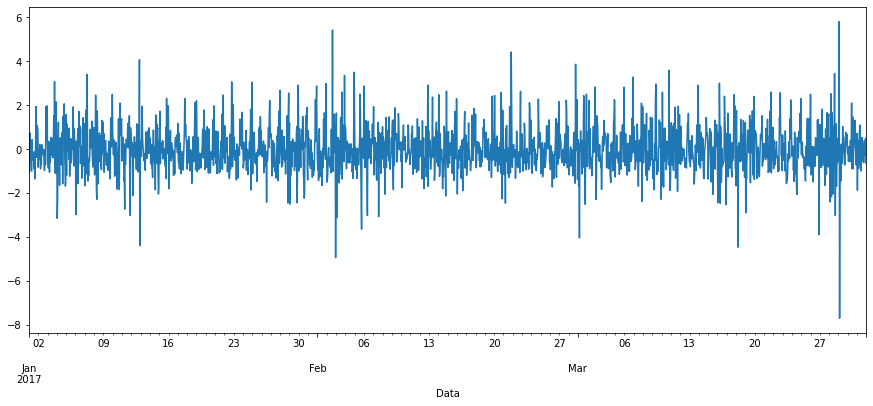

In [22]:
# Analise de 3 meses de dados 
filtro = ( df_serietemporal_verif.index.month >= 1 ) & ( df_serietemporal_verif.index.month <= 3 )
df_serietemporal_verif[filtro].Magnitude_Verif.diff().plot(figsize=(15,6))

Data
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Magnitude_Verif, dtype: object

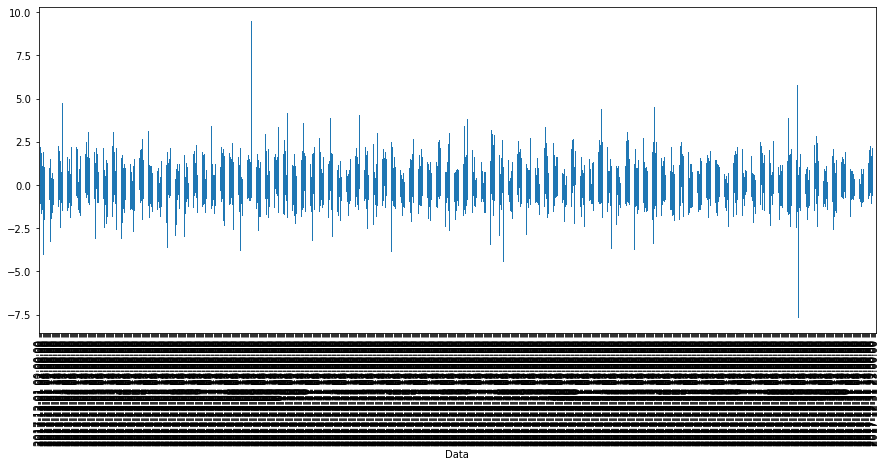

In [23]:
df_serietemporal_verif.Magnitude_Verif.diff().groupby(df_serietemporal_verif.index.month).plot(kind='bar',figsize=(15,6))

## #############################################